# Вторая лабораторная работа

P.S: Для данной работы было принято решение оставить предыдущий датасет - https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022

## Добавление нового атрибута:

К существующему набору данных была внесена дополнительная характеристика - относительная почасовая заработная плата для мужчин и женщин в зависимости от уровня образования. Этот показатель рассчитывается с использованием формулы: текущая почасовая заработная плата для мужчин/женщин на конкретном уровне образования, делённая на среднюю почасовую заработную плату среди мужчин/женщин с учетом всех уровней образования. Выбор данного атрибута обусловлен стремлением к более глубокому пониманию различий в заработной плате, анализу влияния уровня образования на эти различия и выявлению возможных неравенств.

Новые показатели были рассчитаны для следующих атрибутов: 'men_less_than_hs', 'men_high_school', 'men_some_college', 'men_bachelors_degree', 'men_advanced_degree', 'women_less_than_hs', 'women_high_school', 'women_some_college', 'women_bachelors_degree', 'women_advanced_degree'.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv("../Lab2/wages_by_education.csv")


In [14]:
selected_columns = ['year', 'men_less_than_hs', 'men_high_school', 'men_some_college',
                    'men_bachelors_degree', 'men_advanced_degree', 'women_less_than_hs',
                    'women_high_school', 'women_some_college', 'women_bachelors_degree',
                    'women_advanced_degree']

df = data_frame[selected_columns].sort_values(by='year', ascending=True)


In [15]:
df['average_hourly_earnings_for_men'] = df.iloc[:, 1:6].sum(axis=1) / (5)
df['average_hourly_earnings_for_women'] = df.iloc[:, 6:11].sum(axis=1) / (5)
#df

,year,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,average_hourly_earnings_for_men,average_hourly_earnings_for_women
49,1973,21.18,26.90,27.67,37.69,40.09,12.89,16.97,18.41,25.50,32.73,30.706,21.300
48,1974,20.63,26.15,26.79,36.62,41.03,12.87,16.49,17.91,24.70,30.78,30.244,20.550
47,1975,20.00,26.02,26.93,36.21,40.86,12.91,16.54,17.91,24.44,32.14,30.004,20.788
46,1976,20.36,26.14,27.10,36.42,40.31,12.96,17.01,18.37,24.52,31.05,30.066,20.782
45,1977,20.43,25.97,26.70,36.09,40.56,13.08,16.71,17.92,23.88,30.33,29.950,20.384
44,1978,20.10,25.97,27.14,35.92,40.89,13.02,16.84,18.17,23.65,30.00,30.004,20.336
43,1979,20.74,26.04,27.18,35.72,39.52,13.54,16.94,18.25,23.26,28.83,29.840,20.164
42,1980,20.08,25.18,26.63,35.16,39.00,13.22,16.54,18.12,22.96,28.47,29.210,19.862
41,1981,19.64,24.84,26.24,35.41,38.72,13.12,16.46,18.13,22.94,28.51,28.970,19.832
40,1982,19.34,24.64,26.22,35.80,39.95,12.82,16.63,18.26,23.57,28.81,29.190,20.018


In [16]:
# Список признаков, для которых мы хотим добавить новый признак - относительная почасовая заработная плата
features_to_add_relative_salary = ['men_less_than_hs', 'men_high_school', 'men_some_college',
                                   'men_bachelors_degree', 'men_advanced_degree', 'women_less_than_hs',
                                   'women_high_school', 'women_some_college', 'women_bachelors_degree',
                                   'women_advanced_degree']
# Добавление нового признака для каждого из существующих признаков
for feature in features_to_add_relative_salary[0:5]:
    relative_salary_feature = f'{feature}_relative_salary'
    
    # Вычисление относительной заработной платы Для мужчин
    df[relative_salary_feature] = df[feature] / df['average_hourly_earnings_for_men']

for feature in features_to_add_relative_salary[5:10]:
    relative_salary_feature = f'{feature}_relative_salary'
    
    # Вычисление относительной заработной платы Для женщин
    df[relative_salary_feature] = df[feature] / df['average_hourly_earnings_for_women']
# Сохраним новый DataFrame
df.to_csv('relative_wages_by_education.csv', index=False)


## "Причесывание" датасета:
* Идентифицировать и удалить выбросы, используя статистические методы.
* Обработать пропущенные значения, заполнив их средними значениями.
* Удалить дубликаты, если они присутствуют.
* Проверить данные на кривизну и произвести необходимые коррекции.

In [17]:
# Удаление выбросов
clear_df = pd.read_csv("../Lab2/relative_wages_by_education.csv")
Q1 = clear_df.iloc[:, 11].quantile(0.25)
Q3 = clear_df.iloc[:, 11].quantile(0.75)
IQR = Q3 - Q1
clear_df = clear_df[(clear_df.iloc[:, 11] >= Q1 - 1.5 * IQR) & (clear_df.iloc[:, 11] <= Q3 + 1.5 * IQR)]

# Обработка дублей 
clear_df = clear_df.drop_duplicates()

# Обработка пропущенных значений
clear_df = clear_df.fillna(clear_df.mean())

# Обнаружение кривых данных
from scipy import stats
z_scores = stats.zscore(clear_df.iloc[:, :])
clear_df = clear_df[(z_scores < 3) & (z_scores > -3)]

clear_df

,year,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,...,men_less_than_hs_relative_salary,men_high_school_relative_salary,men_some_college_relative_salary,men_bachelors_degree_relative_salary,men_advanced_degree_relative_salary,women_less_than_hs_relative_salary,women_high_school_relative_salary,women_some_college_relative_salary,women_bachelors_degree_relative_salary,women_advanced_degree_relative_salary
0,1973,21.18,26.90,27.67,37.69,40.09,12.89,16.97,18.41,25.50,...,0.689767,0.876050,0.901127,1.227447,1.305608,0.605164,0.796714,0.864319,1.197183,1.536620
1,1974,20.63,26.15,26.79,36.62,41.03,12.87,16.49,17.91,24.70,...,0.682119,0.864634,0.885796,1.210819,1.356633,0.626277,0.802433,0.871533,1.201946,1.497810
2,1975,20.00,26.02,26.93,36.21,40.86,12.91,16.54,17.91,24.44,...,0.666578,0.867218,0.897547,1.206839,1.361818,0.621031,0.795651,0.861555,1.175678,1.546084
3,1976,20.36,26.14,27.10,36.42,40.31,12.96,17.01,18.37,24.52,...,0.677177,0.869421,0.901350,1.211335,1.340717,0.623617,0.818497,0.883938,1.179867,1.494081
4,1977,20.43,25.97,26.70,36.09,40.56,13.08,16.71,17.92,23.88,...,0.682137,0.867112,0.891486,1.205008,1.354257,0.641680,0.819761,0.879121,1.171507,1.487932
5,1978,20.10,25.97,27.14,35.92,40.89,13.02,16.84,18.17,23.65,...,0.669911,0.865551,0.904546,1.197174,1.362818,0.640244,0.828088,0.893489,1.162962,1.475216
6,1979,20.74,26.04,27.18,35.72,39.52,13.54,16.94,18.25,23.26,...,0.695040,0.872654,0.910858,1.197051,1.324397,0.671494,0.840111,0.905078,1.153541,1.429776
7,1980,20.08,25.18,26.63,35.16,39.00,13.22,16.54,18.12,22.96,...,0.687436,0.862034,0.911674,1.203697,1.335159,0.665593,0.832746,0.912295,1.155976,1.433390
8,1981,19.64,24.84,26.24,35.41,38.72,13.12,16.46,18.13,22.94,...,0.677943,0.857439,0.905765,1.222299,1.336555,0.661557,0.829972,0.914179,1.156716,1.437576
9,1982,19.34,24.64,26.22,35.80,39.95,12.82,16.63,18.26,23.57,...,0.662556,0.844125,0.898253,1.226447,1.368619,0.640424,0.830752,0.912179,1.177440,1.439205


## Построение графиков:

* Использовать plt.scatter для построения графиков зависимости одной переменной от другой.
* Описать обнаруженные кластеры или группы на графиках.
* Построить несколько разных графиков, чтобы выделить различные аспекты зависимостей в данных.

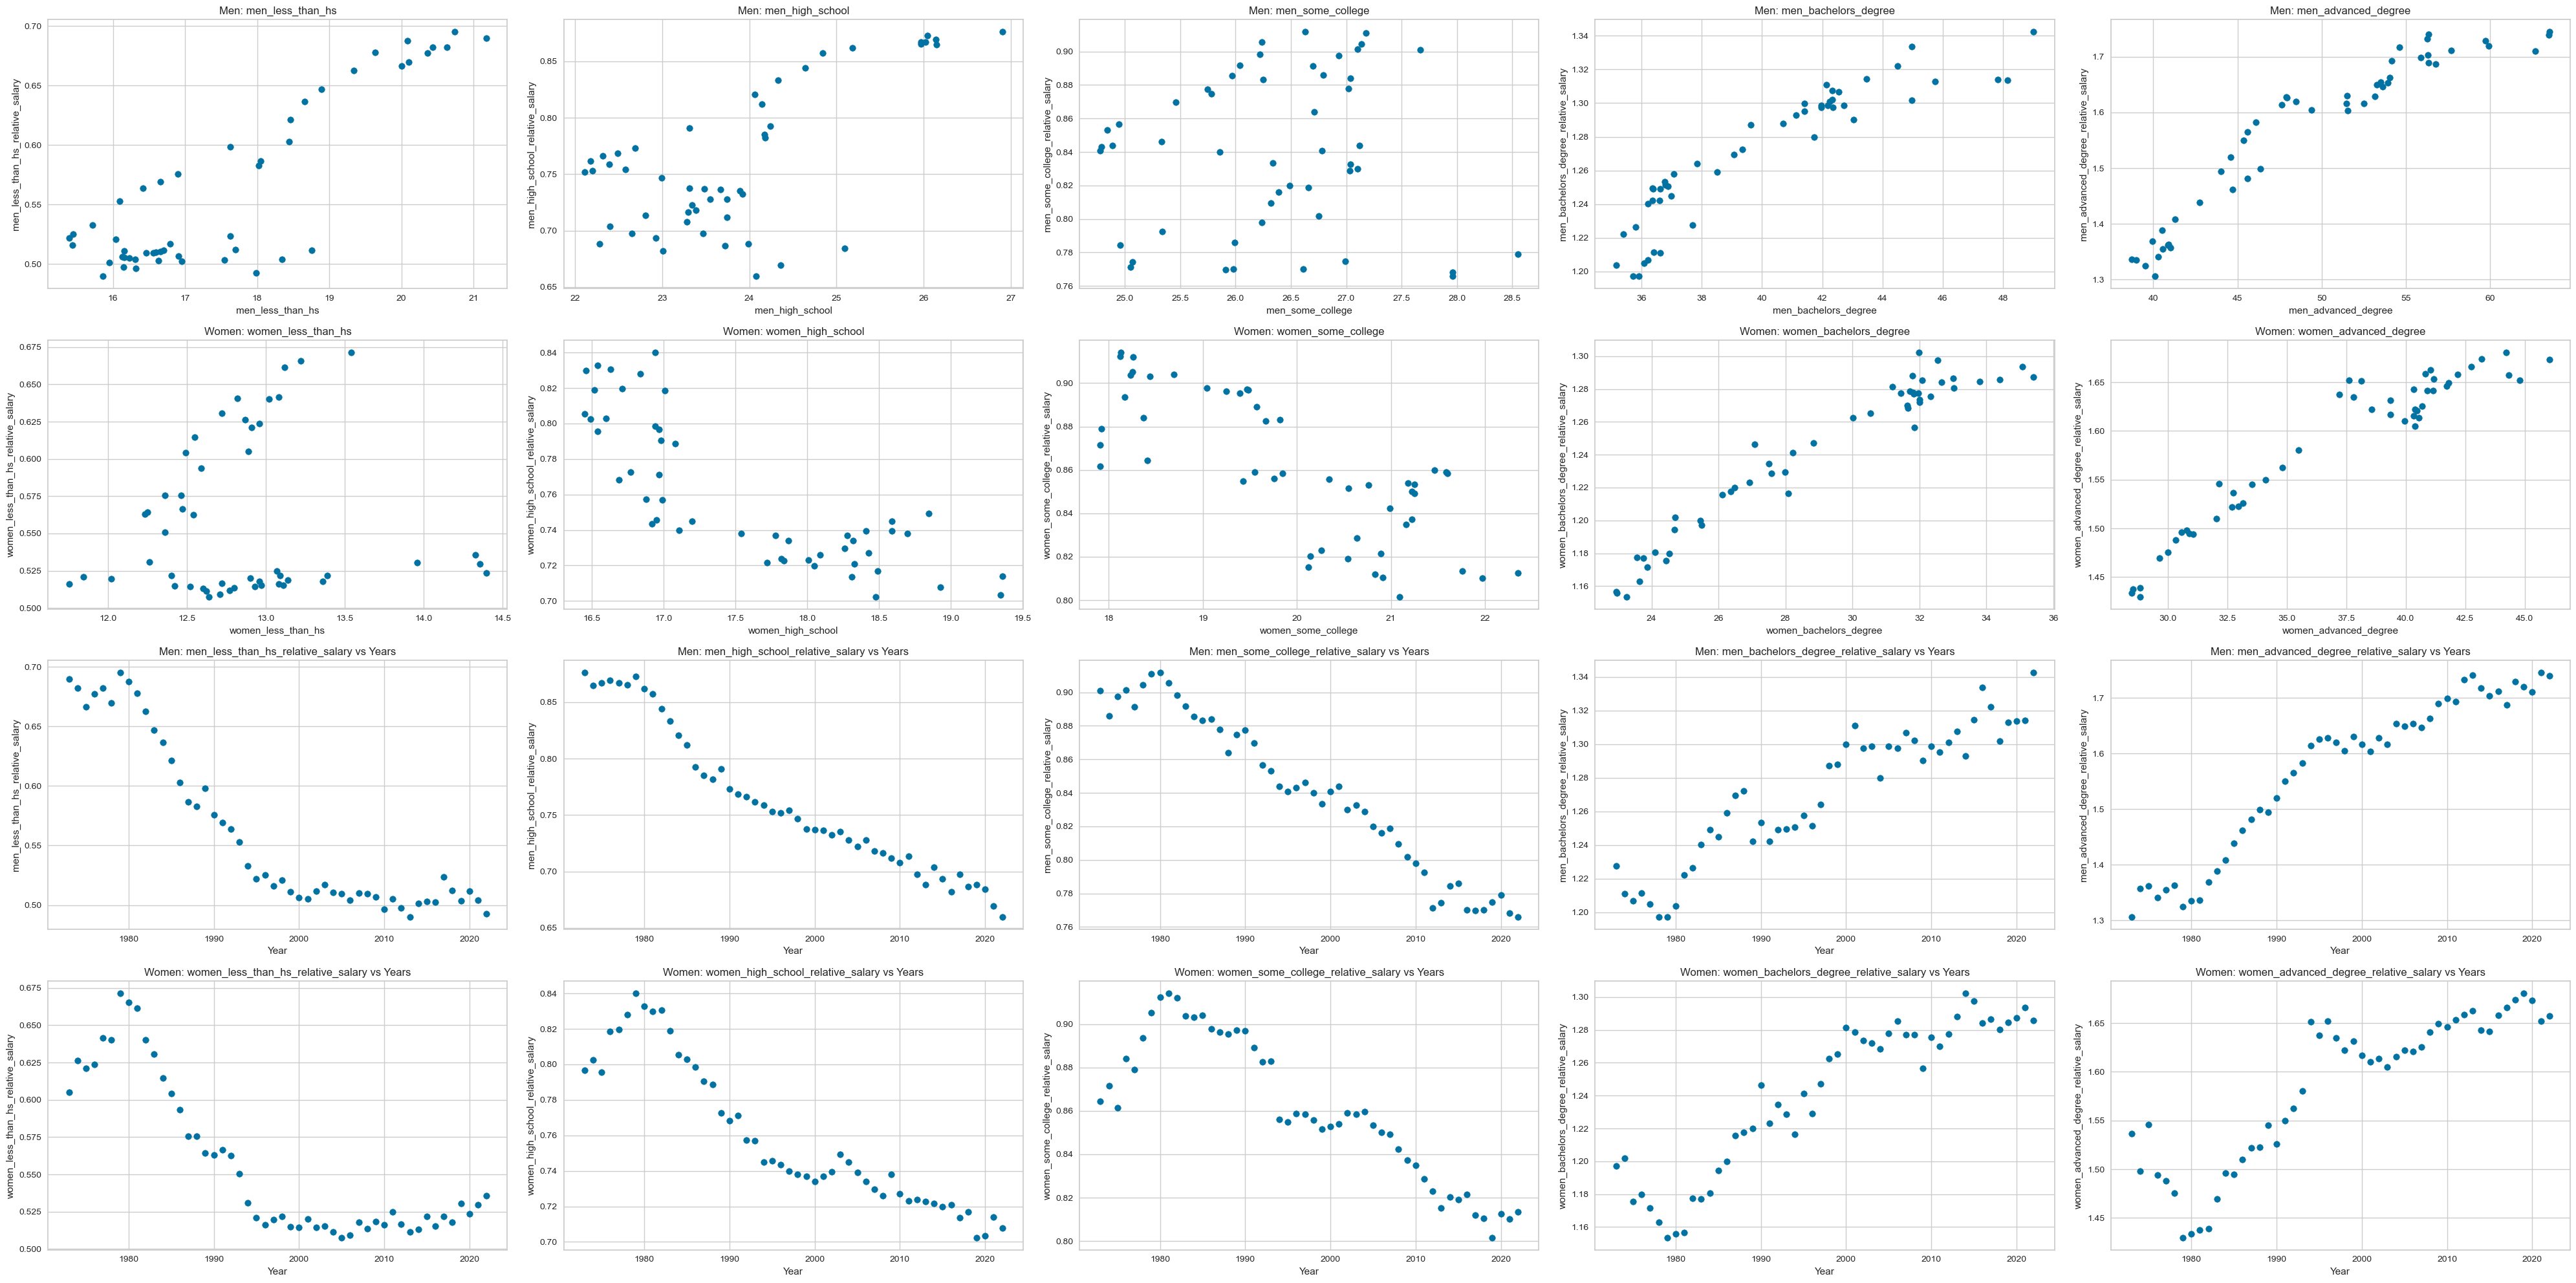

In [29]:
# Выбор признаков
education_features_men = ['men_less_than_hs', 'men_high_school', 'men_some_college',
                           'men_bachelors_degree', 'men_advanced_degree']

education_features_women = ['women_less_than_hs', 'women_high_school', 'women_some_college',
                             'women_bachelors_degree', 'women_advanced_degree']

# Выбор соответствующих относительных зарплат
relative_salary_features_men = [f'{feature}_relative_salary' for feature in education_features_men]
relative_salary_features_women = [f'{feature}_relative_salary' for feature in education_features_women]

# Построение графиков
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(40, 20))

# Графики для мужчин
for i, (feature, relative_salary) in enumerate(zip(education_features_men, relative_salary_features_men)):
    axes[0, i].scatter(clear_df[feature], clear_df[relative_salary])
    axes[0, i].set_title(f'Men: {feature}')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel(relative_salary)

# Графики для женщин
for i, (feature, relative_salary) in enumerate(zip(education_features_women, relative_salary_features_women)):
    axes[1, i].scatter(clear_df[feature], clear_df[relative_salary])
    axes[1, i].set_title(f'Women: {feature}')
    axes[1, i].set_xlabel(feature)
    axes[1, i].set_ylabel(relative_salary)

# Графики для мужчин
for i, relative_salary in enumerate(relative_salary_features_men):
    axes[2, i].scatter(clear_df['year'], clear_df[relative_salary])
    axes[2, i].set_title(f'Men: {relative_salary} vs Years')
    axes[2, i].set_xlabel('Year')
    axes[2, i].set_ylabel(relative_salary)
    
# Графики для женщин
for i, relative_salary in enumerate(relative_salary_features_women):
    axes[3, i].scatter(clear_df['year'], clear_df[relative_salary])
    axes[3, i].set_title(f'Women: {relative_salary} vs Years')
    axes[3, i].set_xlabel('Year')
    axes[3, i].set_ylabel(relative_salary)


plt.tight_layout()
plt.show()

## Визуальный анализ кластеров

Исследование зависимости между относительной почасовой оплатой мужчин с образованием ниже старшей школы и временными интервалами (Третий ряд, первый столбец) позволяет выделить три выраженных кластера, которые олицетворяют различные периоды во времени, характеризующиеся изменением состояний.


Первый кластер, охватывающий период с 1973 по 1980 год, характеризуется высоким уровнем почасовой оплаты для мужчин с образованием ниже старшей школы. Этот уровень оказывается ниже среднего уровня для мужчин в целом всего на 30%, что, тем не менее, представляет собой хороший результат для данной группы в данном временном интервале. Это подчеркивает стабильность высоких показателей относительной почасовой оплаты в указанный период.

Второй кластер, который простирается с 1982 по 1994 год, показывает падение средних показателей почасовой оплаты для данного уровня образования относительно общего среднего уровня. Этот период свидетельствует о снижении заработной платы в сравнении с другими образовательными группами.

Заключительный кластер, включающий временной интервал с 1994 года до наших дней, отражает относительную стабильность средних показателей оплаты труда для данного уровня образования.



## Применение метода KMeans:

### Идея алгоритма k-средних

На каждой итерации вычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Для данного метода предусматриваются различные модификации, такие как:

* Метод k-медиан (k-medians). Для вычисления центроидов используется не среднее, а медиана (значение, показывающее середину отсортированных по возрастанию данных), что делает алгоритм более устойчивым к аномальным значениям в данных.
* Метод k-means++. «Интеллектуальная» инициализация центроидов. Чем дальше расположена точка от текущих известных центров, тем выше вероятность ее выбора.
* Метод k-медоидов (k-medoids). Центроиды всегда выбираются из объектов выборки, среднее отличие которого от всех объектов в кластере минимально. Это медоид – самая центральная точка кластера.
* Метод G-Means не зависит от выбора числа кластеров. G-Means пытается автоматически определить количество кластеров с помощью теста на нормальность.


В процессе решения задач по кластеризации важно предварительно определить наилучшее количество кластеров. Для этого можно применять различные методы, такие как:

### "Метод локтя"
1. Строится график, где по оси абсцисс — число кластеров, а по оси ординат — суммы внутрикластерных расстояний.
2. Нужно выбрать точку на оси OX, после которой значения по оси OY начинают очень медленно линейно уменьшаться.
3. Вообще обоснование выбора в этом подходе достаточно субъективное. В некоторых случаях на графике метода локтя трудно выбрать подходящую точку, в которой линия на самом деле изгибается.

### «Силуэтный метод»

Подробнее о нем можно почитать в данной статье - https://en.wikipedia.org/wiki/Silhouette_(clustering)

В примере ниже был использован KElbowVisualizer в библиотеке Yellowbrick, который реализует метод локтя для
выбора оптимального числа кластеров при кластеризации методом k-средних с метрикой силуэтов.

На графике вы сможете увидеть показатель silhouette_score, в свою очередь будем считать, что максимальное среднее значение силуэтов для различного числа кластеров k покажет оптимальное количество кластеров.

D:\Games\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Games\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Games\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Games\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

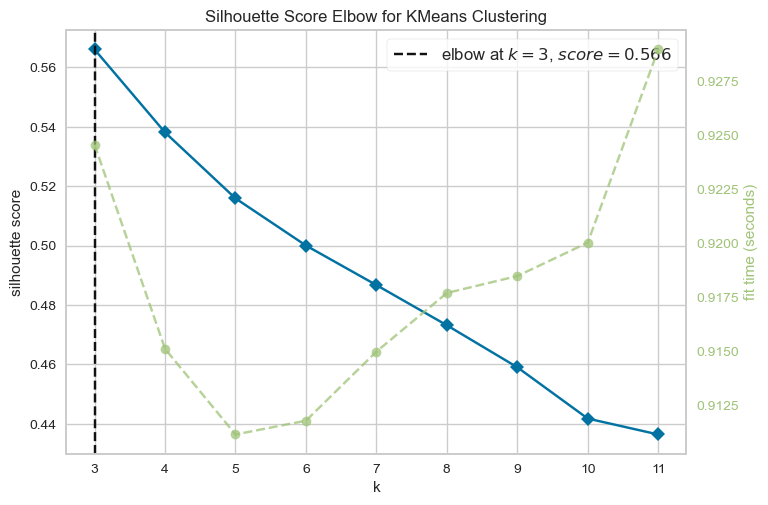

D:\Games\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Games\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


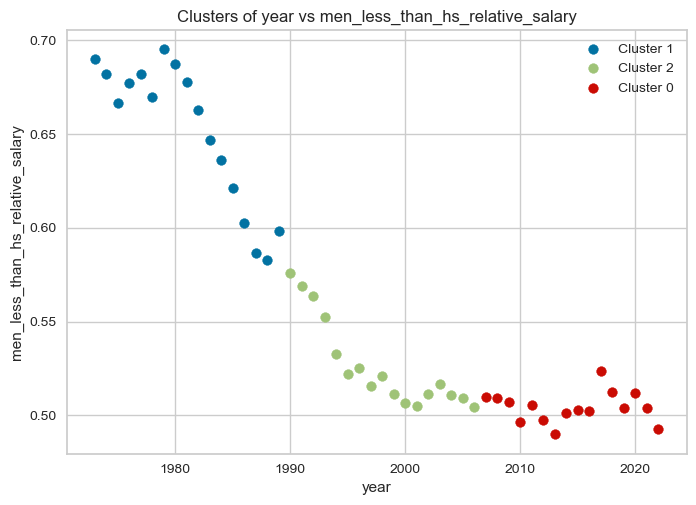

In [31]:
# Пытался проигнорировать ошибки, не получилось
from sklearn.cluster import KMeans
import os

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
os.environ['OMP_NUM_THREADS'] = '1'

selected_features = ['year', 'men_less_than_hs_relative_salary']

selected_data = clear_df[selected_features]

# Как подобрать оптимальное количество кластеров?
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model , k=(3,12), metric='silhouette')
visualizer.fit(selected_data); visualizer.show()

# Алгоритм k-средних
kmeans = KMeans(n_clusters=3, random_state=42)
clear_df['cluster'] = kmeans.fit_predict(selected_data)

# Визуализация результатов
for cluster in clear_df['cluster'].unique():
    cluster_data = clear_df[clear_df['cluster'] == cluster]
    plt.scatter(cluster_data[selected_features[0]], cluster_data[selected_features[1]], label=f'Cluster {cluster}')

plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.title(f'Clusters of {selected_features[0]} vs {selected_features[1]}')
plt.show()



## Вывод

В ходе выполнения текущей лабораторной работы были сделаны следующие выводы:

Внесение новых атрибутов в данные предоставляет возможность обогатить информацию и достичь более всестороннего понимания для последующего анализа.

Этап "причесывания" датасета представляет собой ключевой этап предобработки, способствующий улучшению качества данных и предотвращению искажений в процессе анализа.

Построение графиков играет важную роль в выявлении визуальных зависимостей и выделении кластеров в данных.

Применение метода KMeans предоставляет дополнительные возможности для анализа, позволяя выделить и более детально изучить характеристики образованных кластеров в данных. Кроме того, было освоено использование различных методов для определения оптимального количества кластеров, что обогатило наши знания в этой области.